In [1]:
import numpy as np
import pandas as pd
import datetime
import math
from scipy import stats
import seaborn as sns
import matplotlib.dates as md
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator

In [2]:
df = pd.read_csv('omni_full.csv')

In [3]:
df["BZ_GSM-1"]=df.BZ_GSM.shift(periods=-1) 
df["BZ_GSM-2"]=df.BZ_GSM.shift(periods=-2) 
df["BZ_GSM-3"]=df.BZ_GSM.shift(periods=-3) 
df["BZ_GSM-4"]=df.BZ_GSM.shift(periods=-4) 
df["BZ_GSM-5"]=df.BZ_GSM.shift(periods=-5) 
df["BZ_GSM-6"]=df.BZ_GSM.shift(periods=-6) 
df["BZ_GSM-7"]=df.BZ_GSM.shift(periods=-7) 
df["BZ_GSM-8"]=df.BZ_GSM.shift(periods=-8) 
df["BZ_GSM-9"]=df.BZ_GSM.shift(periods=-9) 
df["BZ_GSM-10"]=df.BZ_GSM.shift(periods=-10) 
df["BZ_GSM-11"]=df.BZ_GSM.shift(periods=-11) 
df["BZ_GSM-12"]=df.BZ_GSM.shift(periods=-12) 
df["BZ_GSM-13"]=df.BZ_GSM.shift(periods=-13) 
df["BZ_GSM-14"]=df.BZ_GSM.shift(periods=-14) 
df["BZ_GSM-15"]=df.BZ_GSM.shift(periods=-15) 
df["BZ_GSM-16"]=df.BZ_GSM.shift(periods=-16) 
df["BZ_GSM-17"]=df.BZ_GSM.shift(periods=-17) 
df["BZ_GSM-18"]=df.BZ_GSM.shift(periods=-18) 
df["BZ_GSM-19"]=df.BZ_GSM.shift(periods=-19) 
df["BZ_GSM-20"]=df.BZ_GSM.shift(periods=-20) 
df["BZ_GSM-21"]=df.BZ_GSM.shift(periods=-21) 
df["BZ_GSM-22"]=df.BZ_GSM.shift(periods=-22) 
df["BZ_GSM-23"]=df.BZ_GSM.shift(periods=-23) 
df["BZ_GSM-24"]=df.BZ_GSM.shift(periods=-24) 

In [4]:
df.to_csv('omni_full.csv') 

In [5]:
df = pd.read_csv('omni_full.csv')
features=['time1','DST', 'BZ_GSM', 'BZ_GSM-1', 'BZ_GSM-2',
       'BZ_GSM-3', 'BZ_GSM-4', 'BZ_GSM-5', 'BZ_GSM-6', 'BZ_GSM-7', 'BZ_GSM-8',
       'BZ_GSM-9', 'BZ_GSM-10', 'BZ_GSM-11', 'BZ_GSM-12', 'BZ_GSM-13',
       'BZ_GSM-14', 'BZ_GSM-15', 'BZ_GSM-16', 'BZ_GSM-17', 'BZ_GSM-18',
       'BZ_GSM-19', 'BZ_GSM-20', 'BZ_GSM-21', 'BZ_GSM-22', 'BZ_GSM-23',
       'BZ_GSM-24']
df = df[features]

In [6]:
correlation_matrix = df.corr()


In [7]:
relevant_correlations = correlation_matrix.loc['DST', 'BZ_GSM':'BZ_GSM-24']


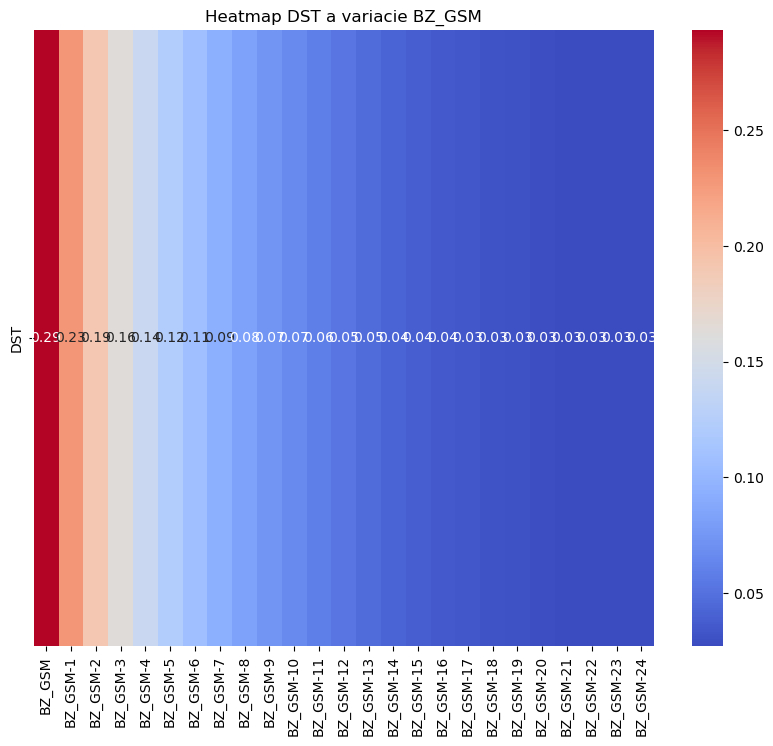

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(relevant_correlations.to_frame().T, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Heatmap DST a variacie BZ_GSM')
plt.show()

In [9]:
df.to_csv('corr_full.csv') 

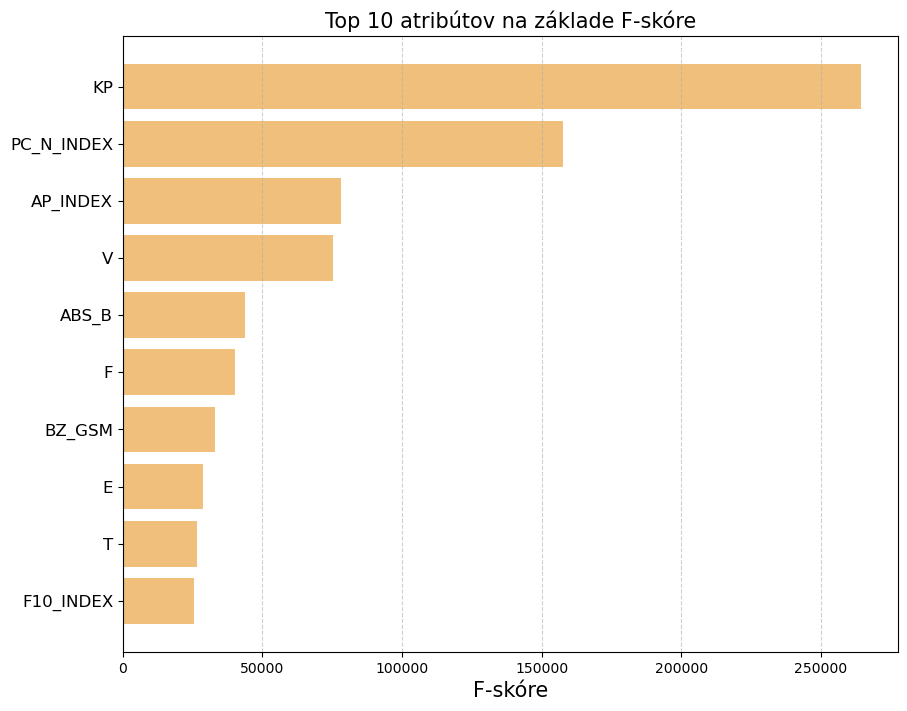

Selected features and their F-scores:
F10_INDEX: 25564.3362587643
T: 26647.422169800244
E: 28834.223602979935
BZ_GSM: 32980.680326247304
F: 40170.21936481888
ABS_B: 43772.22250698062
V: 75424.30553645539
AP_INDEX: 78205.08182461992
PC_N_INDEX: 157600.10497768712
KP: 264362.2742795953


In [10]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('omni_full.csv')
df = df.drop(columns=['time1'])
df.fillna(df.median(), inplace=True)

y = df['DST'].values
X = df.drop(columns=['DST']).values
feature_labels = df.drop(columns=['DST']).columns.values
numFeatures = 10


fSelect_model = SelectKBest(score_func=f_regression, k=numFeatures)
X_fSelect = fSelect_model.fit_transform(X, y)


scores = fSelect_model.scores_
scores[np.isnan(scores)] = 0  


order = np.argsort(scores)
ordered_feature_labels = feature_labels[order]
y_pos = np.arange(len(feature_labels))


plt.figure(figsize=(10, 8))
plt.barh(y_pos[-numFeatures:], scores[order][-numFeatures:], align='center', color="#EFBF7B")
plt.yticks(y_pos[-numFeatures:], ordered_feature_labels[-numFeatures:], fontsize=12)
plt.xlabel('F-skóre', fontsize=15)
plt.title('Top 10 atribútov na základe F-skóre', fontsize=15)
plt.grid(axis='x', linestyle='--', alpha=0.6) 
plt.savefig("KBest")
plt.show()


selected_feature_labels = ordered_feature_labels[-numFeatures:]
selected_scores = scores[order][-numFeatures:]

print("Selected features and their F-scores:")
for label, score in zip(selected_feature_labels, selected_scores):
    print(f"{label}: {score}")


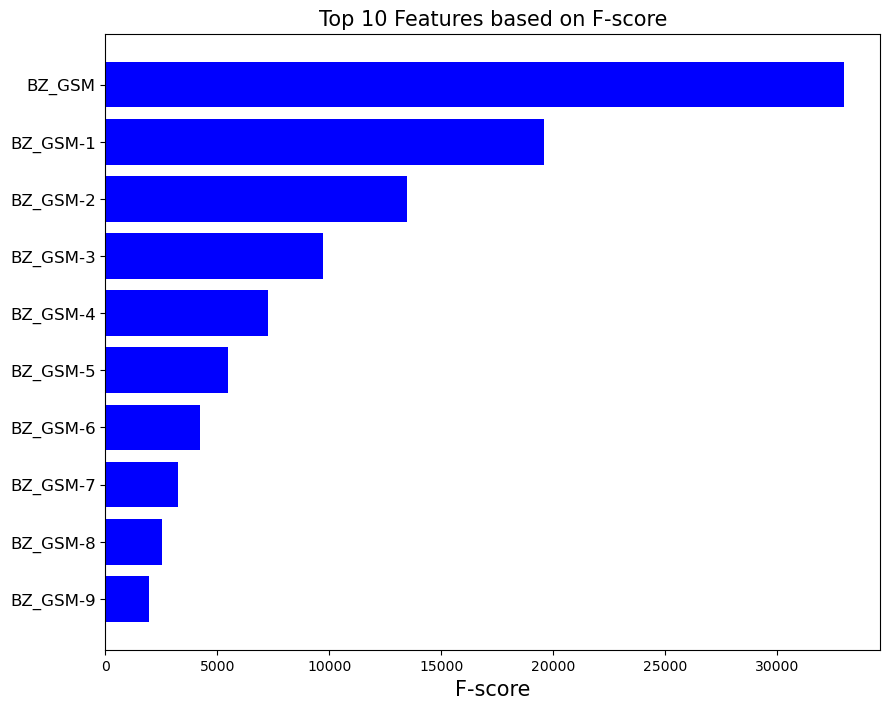

Selected features and their F-scores:
BZ_GSM-9: 1964.8476805979333
BZ_GSM-8: 2515.043451410322
BZ_GSM-7: 3258.8210922983103
BZ_GSM-6: 4228.606555630022
BZ_GSM-5: 5480.896861035336
BZ_GSM-4: 7249.807928119448
BZ_GSM-3: 9729.673485545503
BZ_GSM-2: 13462.925281995978
BZ_GSM-1: 19603.722781057728
BZ_GSM: 32980.680326247304


In [11]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
import numpy as np
import matplotlib.pyplot as plt

# Načítanie datasetu
df = pd.read_csv('corr_full.csv')

# Odstránenie stĺpca 'time1', pretože na analýzu korelácie s DST nie je potrebný
df = df.drop(columns=['time1'])

# Nahradenie NaN hodnôt mediánom pre každý stĺpec
df.fillna(df.median(), inplace=True)

# Definovanie predikovanej premennej 'DST' a prvkov X
y = df['DST'].values
X = df.drop(columns=['DST']).values
feature_labels = df.drop(columns=['DST']).columns.values

# Počet prvkov, ktoré chceme vybrať - pre tento príklad vyberieme top 10 prvkov
numFeatures = 10

# Výber najlepších prvkov pomocou SelectKBest a f_regression
fSelect_model = SelectKBest(score_func=f_regression, k=numFeatures)
X_fSelect = fSelect_model.fit_transform(X, y)

# Získanie skóre pre každý prvok
scores = fSelect_model.scores_
scores[np.isnan(scores)] = 0  # Nahradenie NaN hodnôt nulou pre vizualizáciu

# Výber a zoradenie prvkov podľa skóre
order = np.argsort(scores)
ordered_feature_labels = feature_labels[order]
y_pos = np.arange(len(feature_labels))

# Vizualizácia top N prvkov
plt.figure(figsize=(10, 8))
plt.barh(y_pos[-numFeatures:], scores[order][-numFeatures:], align='center', color="#EFBF7B")
plt.yticks(y_pos[-numFeatures:], ordered_feature_labels[-numFeatures:], fontsize=12)
plt.xlabel('F-score', fontsize=15)
plt.title('Top 10 Features based on F-score', fontsize=15)

# Zobrazenie grafu
plt.show()

# Výpis vybraných prvkov a ich skóre
selected_feature_labels = ordered_feature_labels[-numFeatures:]
selected_scores = scores[order][-numFeatures:]

print("Selected features and their F-scores:")
for label, score in zip(selected_feature_labels, selected_scores):
    print(f"{label}: {score}")
